# Excercise 9.3

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 2D Self-Organizing Maps for 3D data

In [4]:
import numpy as np

X = np.loadtxt("bowl.csv", skiprows=1, usecols=(1,2,3), delimiter=",").T
np.random.shuffle(X.T)

Text(0.5, 0, 'z')

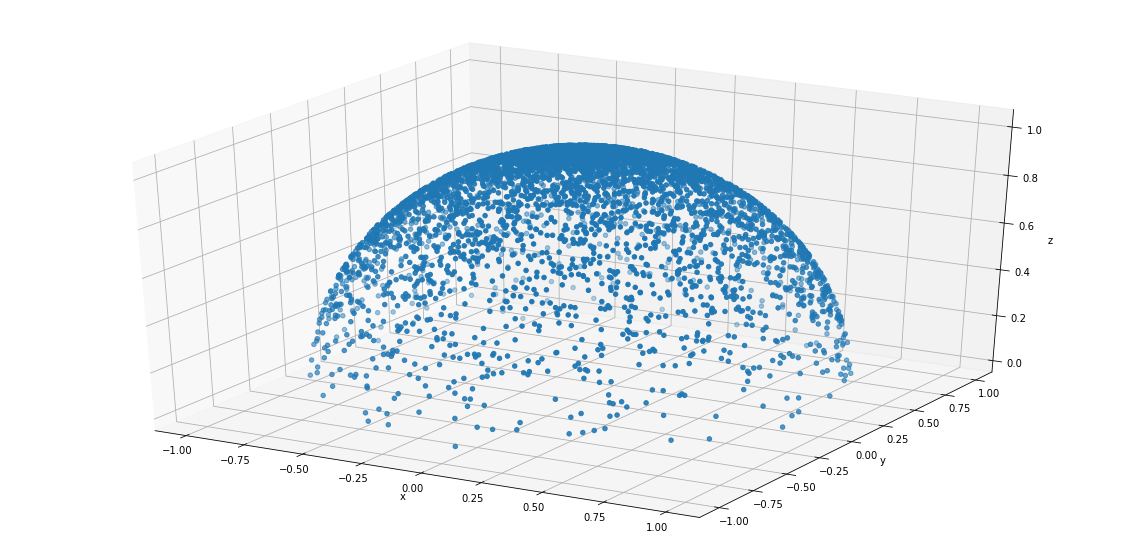

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plot_3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plot_3d.scatter(*X)
plot_3d.set_xlabel('x')
plot_3d.set_ylabel('y')
plot_3d.set_zlabel('z')

In [6]:
from lib.som import h_gauss

h_gauss(np.array([0,1]), np.array([2,2]), 1)

0.08208499862389876

Text(0.5, 0, 'z')

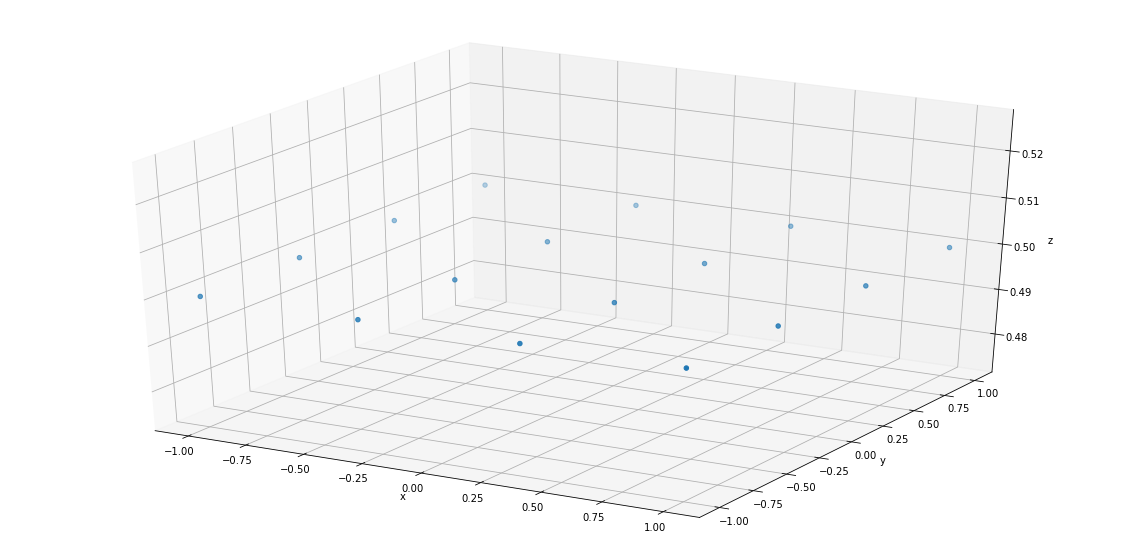

In [7]:
def initialize_som_prototypes(M):
    x = np.linspace(-1, 1, M)
    y = np.linspace(-1, 1, M)
    z = np.full((M, M), 0.5)
    xv, yv = np.meshgrid(x, y)
    w0 = np.dstack((xv, yv, z))
    return w0

w0 = initialize_som_prototypes(4)

plot_3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plot_3d.scatter(w0[:,:,0].reshape(-1), w0[:,:,1].reshape(-1), w0[:,:,2].reshape(-1))
plot_3d.set_xlabel('x')
plot_3d.set_ylabel('y')
plot_3d.set_zlabel('z')

In [8]:
print(w0)
print(w0[0, 0])

[[[-1.         -1.          0.5       ]
  [-0.33333333 -1.          0.5       ]
  [ 0.33333333 -1.          0.5       ]
  [ 1.         -1.          0.5       ]]

 [[-1.         -0.33333333  0.5       ]
  [-0.33333333 -0.33333333  0.5       ]
  [ 0.33333333 -0.33333333  0.5       ]
  [ 1.         -0.33333333  0.5       ]]

 [[-1.          0.33333333  0.5       ]
  [-0.33333333  0.33333333  0.5       ]
  [ 0.33333333  0.33333333  0.5       ]
  [ 1.          0.33333333  0.5       ]]

 [[-1.          1.          0.5       ]
  [-0.33333333  1.          0.5       ]
  [ 0.33333333  1.          0.5       ]
  [ 1.          1.          0.5       ]]]
[-1.  -1.   0.5]


In [19]:
from lib.k_means import initialize_prototypes, dist

def som_online_2d(X, M, w0, epsilon0, sigma0, epsilon_plateau, decay_epsilon, decay_sigma):
    N, p = X.shape

    epsilon = epsilon0
    sigma = sigma0
    w = w0.copy()

    w_history = []
    epsilon_history = []
    sigma_history = []
    for i in np.arange(p):
        x = X[:,i]
        distances = np.zeros((M, M))
        for k in np.arange(M):
            for l in np.arange(M):
                w_k_l = w[k, l]
                distances[k,l] = dist(w_k_l, x)

        winning_neuron_indices = np.unravel_index(distances.argmin(), distances.shape)
        
        winning_neuron = w[winning_neuron_indices[0], winning_neuron_indices[1]]
        delta_w = np.zeros((M, M, N))
        for k in np.arange(M):
            for l in np.arange(M):
                w_k_l = w[k,l]
                delta_w[k,l] = epsilon * h_gauss(np.array((k,l)), winning_neuron_indices, sigma) * (x - w_k_l)

        w += delta_w
                
        w_history.append(w.copy())
        if i > p * epsilon_plateau:
            epsilon *= decay_epsilon
        epsilon_history.append(epsilon)
        sigma *= decay_sigma
        sigma_history.append(sigma)
    return w, np.array(epsilon_history), np.array(sigma_history), np.array(w_history)

In [20]:
M = 16
w0 = initialize_som_prototypes(M)
w, epsilon_history, sigma_history, w_history = som_online_2d(
        X=X, M=M, w0=w0, epsilon0=0.3, sigma0=10, epsilon_plateau=0.5, decay_epsilon=0.99, decay_sigma=0.995
    )

Text(0.5, 0, 'z')

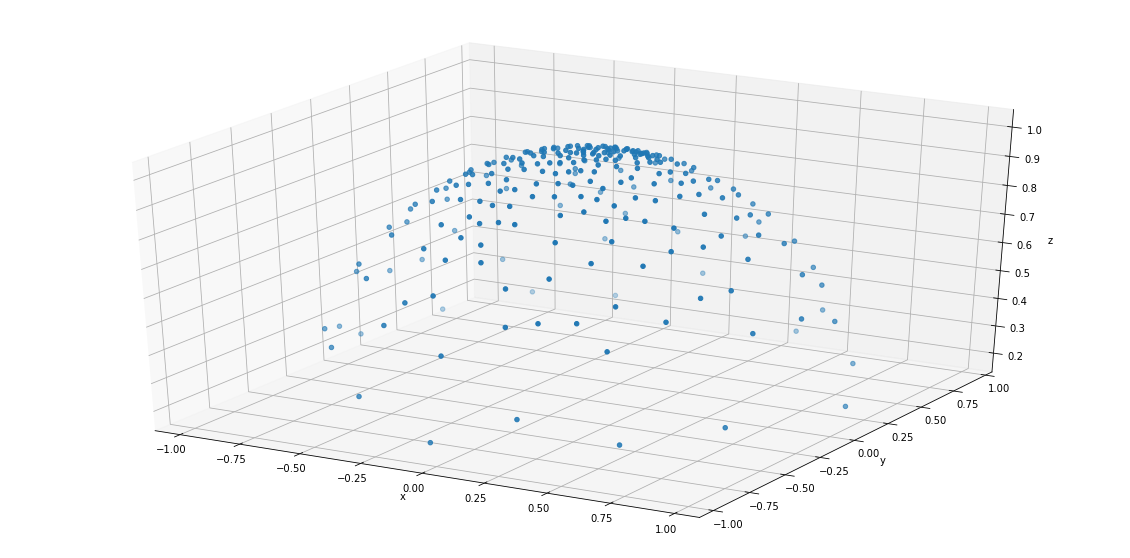

In [21]:
plot_3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plot_3d.scatter(w[:,:,0].reshape(-1), w[:,:,1].reshape(-1), w[:,:,2].reshape(-1))
plot_3d.set_xlabel('x')
plot_3d.set_ylabel('y')
plot_3d.set_zlabel('z')

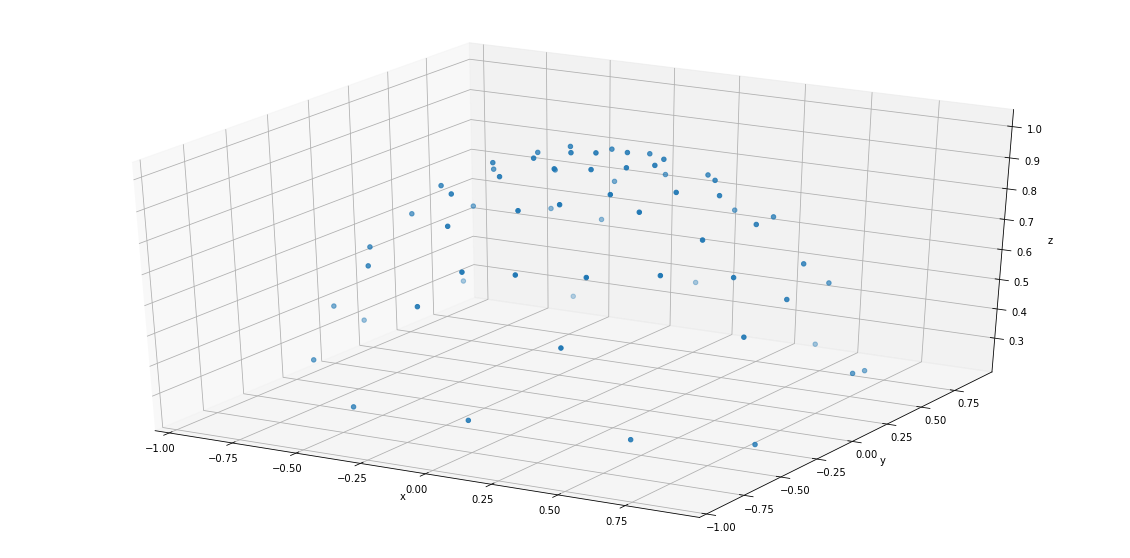

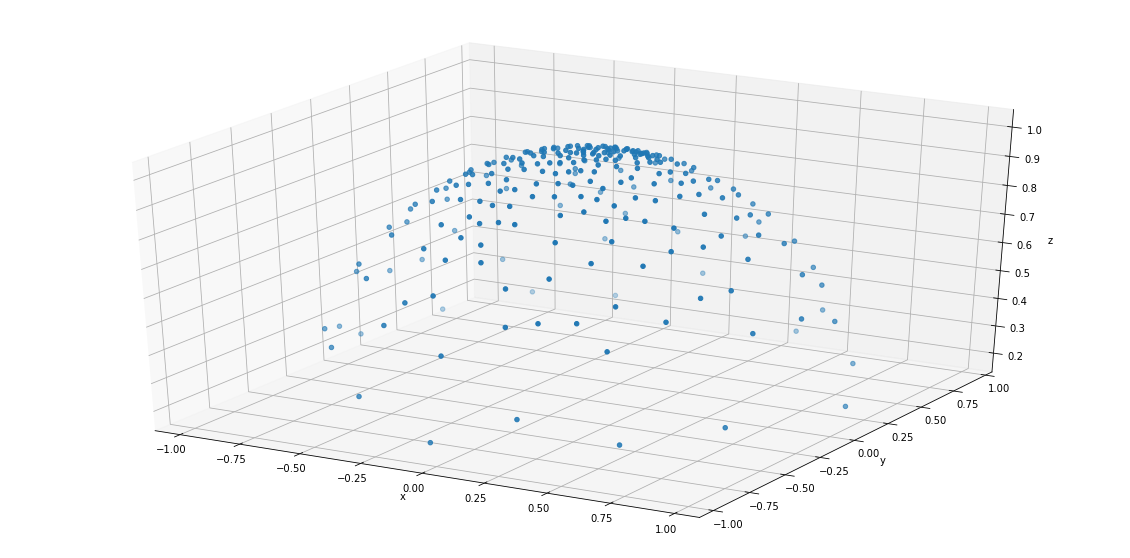

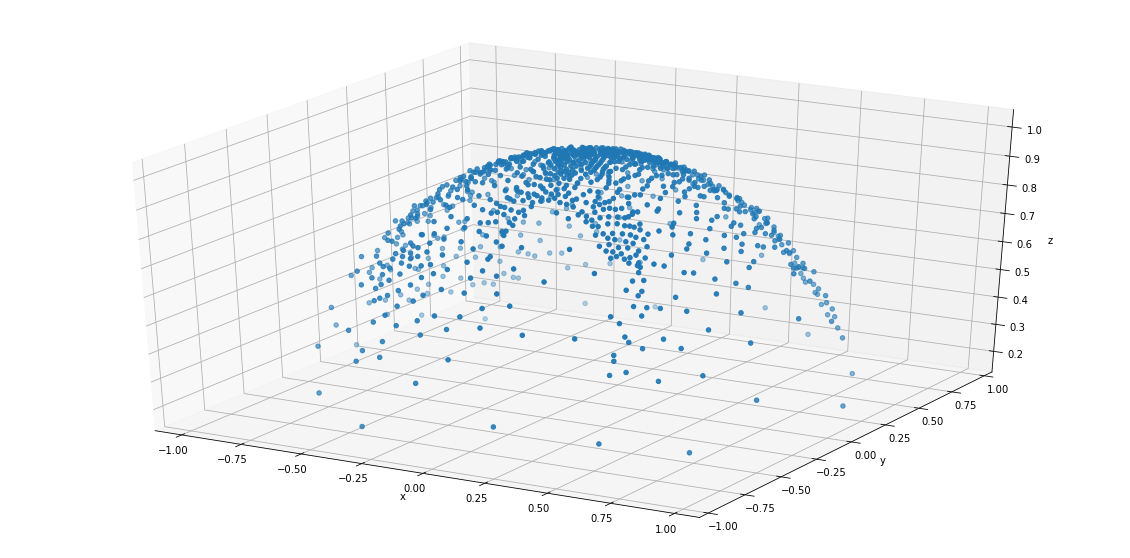

In [27]:
for M in [8, 16, 32]:
    w0 = initialize_som_prototypes(M)
    w, epsilon_history, sigma_history, w_history = som_online_2d(
            X=X, M=M, w0=w0, epsilon0=0.3, sigma0=10, epsilon_plateau=0.5, decay_epsilon=0.99, decay_sigma=0.995
        )
    plot_3d = plt.figure(figsize=(20,10)).gca(projection='3d')
    plot_3d.scatter(w[:,:,0].reshape(-1), w[:,:,1].reshape(-1), w[:,:,2].reshape(-1))
    plot_3d.set_xlabel('x')
    plot_3d.set_ylabel('y')
    plot_3d.set_zlabel('z')